<a href="https://colab.research.google.com/github/jillginger/textscraping/blob/master/jing_ra_work_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Scraping RA Work November 26 2019

## Objectives

Make a csv file that contains colums:


1. petition_id
2. petition_name
3. url
4. signature_count
5. "response_received"- 0 for no response received, 1 for response received.
6. "debated" - 0 for not debated, 1 for debated
7. "closed" - 0 for open, 1 for closed
8. "rejected" - 0 for not rejected, 1 for rejected.
9. date petition opened
10. date petition closed
11. Background info



## Method


The webside provides 563 webpages showing the general information of all petitions (https://petition.parliament.uk/petitions.json?page=1&state=all) (https://petition.parliament.uk/petitions.json?page=2&state=all) ..... (https://petition.parliament.uk/petitions.json?page=563&state=all). Thus, the objective 1 can be solved as a looped JSON-parsing problem. 

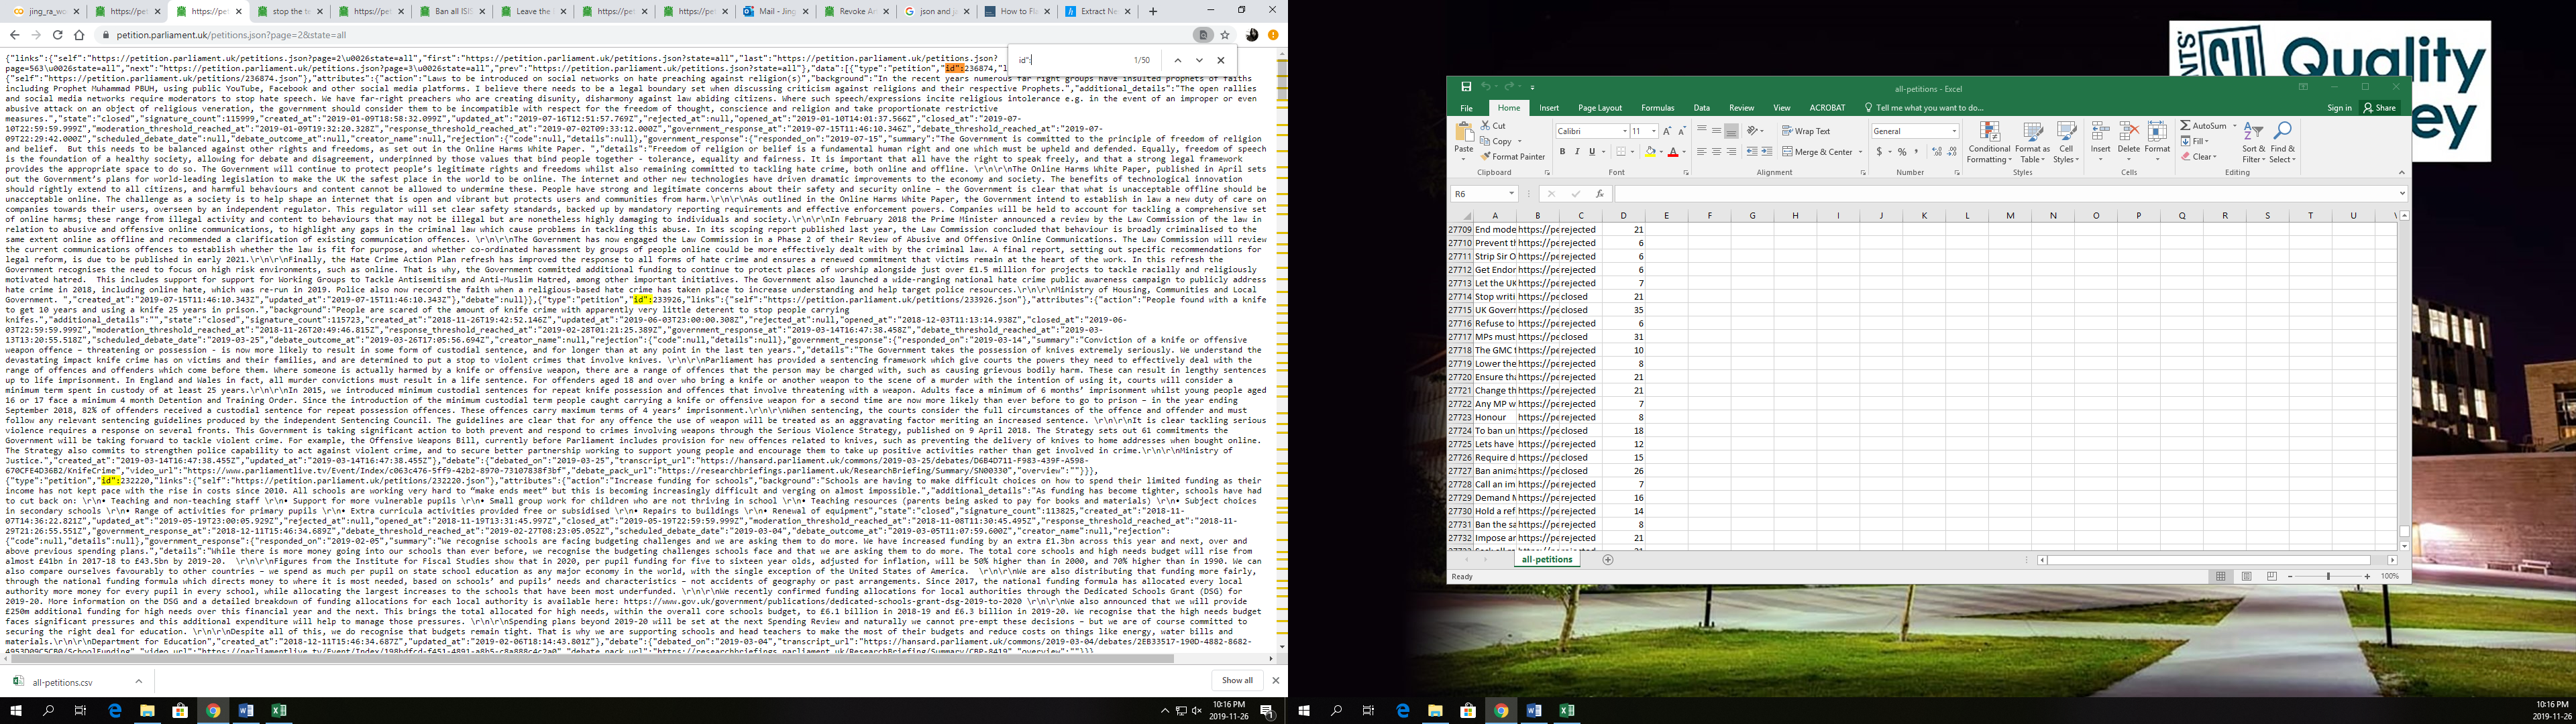

The webside also provides detailed petition information in JSON format, stored on webpages such as https://petition.parliament.uk/petitions/229963.json . Thus, the objective 2 can be solved as a looped, web request and parsing problem.

## Request information from a page with all petitions and save as JSON object

Webpage: https://petition.parliament.uk/petitions.json

This url contains all petition data in nested JSON format.

This file has layers.

EXP:

Layer 1: "data":[
  
Layer 1.1: "type":"petition"
  
Layer 1.2: **"id":241584**
  
 Layer 1.3: "links":{
   
  Layer 1.3.1: **"self": "url"**

Layer 1.4.: attributes

 **Layer 1.4.1: action: "name of the petition"**

 **Layer 1.4.2: background: "background info"**

 **Layer 1.4.3: additional_details:"more details"**

 **Layer 1.4.4: state: "open/closed/rejected"**

 **Layer 1.4.5: signature_count**

 Layer 1.4.6: created_at

 Layer 1.4.7: updated_at

 **Layer 1.4.8: rejected_at**

 **Layer 1.4.9: open_at**

 **Layer 1.4.10: closed_at**
 .

 .

 .

 .

 .

 .


 **Layer 1.4.13: government_response_at**
  .

 .

 .
 
 **Layer 1.4.20: debate**

 **Layer 1.4.20.1: debated_on":"a date"**





It has so many layers.

So. Many.

Just like this:

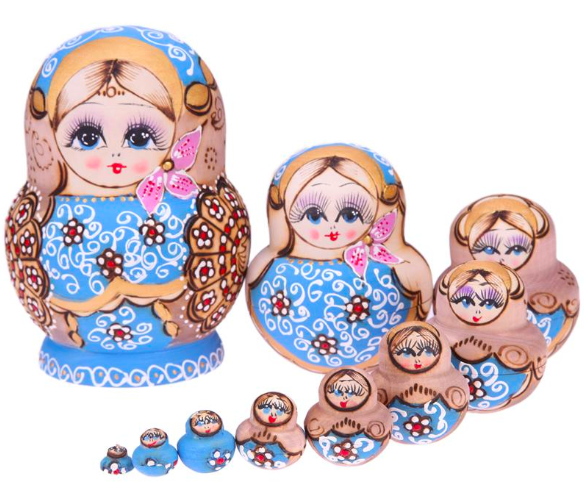

We are going to flattern these nested data to tables.

## Test: request info from one page

In [0]:
import requests
import json

In [0]:
r = requests.get('https://petition.parliament.uk/petitions.json?page=1&state=all')
j = r.json()

### define a function extract_element_from_json(obj,path)

In [0]:
def extract_element_from_json(obj, path):
    '''
    Extracts an element from a nested dictionary or
    a list of nested dictionaries along a specified path.
    If the input is a dictionary, a list is returned.
    If the input is a list of dictionary, a list of lists is returned.
    obj - list or dict - input dictionary or list of dictionaries
    path - list - list of strings that form the path to the desired element
    '''
    def extract(obj, path, ind, arr):
        '''
            Extracts an element from a nested dictionary
            along a specified path and returns a list.
            obj - dict - input dictionary
            path - list - list of strings that form the JSON path
            ind - int - starting index
            arr - list - output list
        '''
        key = path[ind]
        if ind + 1 < len(path):
            if isinstance(obj, dict):
                if key in obj.keys():
                    extract(obj.get(key), path, ind + 1, arr)
                else:
                    arr.append(None)
            elif isinstance(obj, list):
                if not obj:
                    arr.append(None)
                else:
                    for item in obj:
                        extract(item, path, ind, arr)
            else:
                arr.append(None)
        if ind + 1 == len(path):
            if isinstance(obj, list):
                if not obj:
                    arr.append(None)
                else:
                    for item in obj:
                        arr.append(item.get(key, None))
            elif isinstance(obj, dict):
                arr.append(obj.get(key, None))
            else:
                arr.append(None)
        return arr
    if isinstance(obj, dict):
        return extract(obj, path, 0, [])
    elif isinstance(obj, list):
        outer_arr = []
        for item in obj:
            outer_arr.append(extract(item, path, 0, []))
        return outer_arr

### Use this function

In [0]:
extract_element_from_json(j,["data","attributes","state"])

['closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed']

### Use `pandas.io.json.json_normalize`

In [0]:
from pandas.io.json import json_normalize

In [0]:
jn=json_normalize(j,"data") #normalize this nested json file to a df

In [0]:
type(jn)

pandas.core.frame.DataFrame

In [0]:
jn.head(3)

,type,id,links.self,attributes.action,attributes.background,attributes.additional_details,attributes.committee_note,attributes.state,attributes.signature_count,attributes.created_at,attributes.updated_at,attributes.rejected_at,attributes.opened_at,attributes.closed_at,attributes.moderation_threshold_reached_at,attributes.response_threshold_reached_at,attributes.government_response_at,attributes.debate_threshold_reached_at,attributes.scheduled_debate_date,attributes.debate_outcome_at,attributes.creator_name,attributes.rejection.code,attributes.rejection.details,attributes.government_response.responded_on,attributes.government_response.summary,attributes.government_response.details,attributes.government_response.created_at,attributes.government_response.updated_at,attributes.debate.debated_on,attributes.debate.transcript_url,attributes.debate.video_url,attributes.debate.debate_pack_url,attributes.debate.overview,attributes.debate
0,petition,241584,https://petition.parliament.uk/petitions/24158...,Revoke Article 50 and remain in the EU.,The government repeatedly claims exiting the E...,,None,closed,6103057,2019-02-14T12:14:59.326Z,2019-11-19T13:44:07.995Z,None,2019-02-20T10:25:02.393Z,2019-08-20T22:59:59.999Z,2019-02-14T14:57:53.747Z,2019-03-18T13:26:30.257Z,2019-03-26T17:19:45.070Z,2019-03-20T20:33:35.184Z,2019-04-01,2019-04-03T11:38:59.231Z,None,None,None,2019-03-26,This Government will not revoke Article 50. We...,It remains the Government’s firm policy not to...,2019-03-26T17:19:45.067Z,2019-03-26T17:19:45.067Z,2019-04-01,https://hansard.parliament.uk/commons/2019-04-...,https://www.youtube.com/watch?v=X1uMe5FmqH8&fe...,https://commonslibrary.parliament.uk/brexit/,,NaN
1,petition,269157,https://petition.parliament.uk/petitions/26915...,Do not prorogue Parliament,Parliament must not be prorogued or dissolved ...,,None,closed,1725631,2019-08-06T08:21:33.311Z,2019-11-07T12:47:34.119Z,None,2019-08-15T16:04:23.329Z,2019-11-06T00:01:00.000Z,2019-08-07T21:45:02.000Z,2019-08-28T10:04:52.000Z,2019-09-09T13:15:53.478Z,2019-08-28T11:38:22.000Z,2019-09-09,2019-09-10T14:24:28.080Z,None,None,None,2019-09-09,"Prorogation is a prerogative Act of the Crown,...",The UK will be leaving the EU on 31 October wh...,2019-09-09T13:15:53.476Z,2019-09-09T13:16:41.712Z,2019-09-09,https://hansard.parliament.uk/commons/2019-09-...,https://www.youtube.com/watch?v=qN9Fd7jv88c,https://researchbriefings.parliament.uk/Resear...,,NaN
2,petition,229963,https://petition.parliament.uk/petitions/22996...,Leave the EU without a deal in March 2019.,We are wasting Billions of pounds of taxpayers...,We will save billions of pounds from our EU di...,None,closed,608152,2018-10-07T22:34:13.115Z,2019-05-09T13:31:25.941Z,None,2018-10-17T09:57:44.028Z,2019-04-17T22:59:59.999Z,2018-10-10T10:54:22.833Z,2018-11-27T21:28:02.990Z,2018-12-14T09:57:34.136Z,2018-12-15T18:51:04.394Z,2019-01-14,2019-01-15T12:39:39.423Z,None,None,None,2018-12-14,The deal that we have reached with the EU is t...,EU leaders have endorsed the Withdrawal Agreem...,2018-12-14T09:57:34.133Z,2018-12-14T10:18:26.531Z,2019-01-14,https://hansard.parliament.uk/commons/2019-01-...,https://parliamentlive.tv/Event/Index/64100b1a...,https://researchbriefings.parliament.uk/Resear...,,NaN


In [0]:
print(jn.iloc[6]['attributes.background']) #check the text is not censored

Every year more and more people, animals and wildlife get hurt by fireworks. It’s time something was fine to stop this. There are enough organised firework groups around for us to still enjoy fireworks safely so please help me stop the needless sale of them to the public!


In [0]:
jnc=jn[['id','links.self','attributes.action','attributes.background','attributes.additional_details','attributes.state','attributes.signature_count','attributes.created_at','attributes.rejected_at','attributes.opened_at','attributes.closed_at', \
       'attributes.government_response_at','attributes.debate.debated_on',]]
jnc.head(3)

,id,links.self,attributes.action,attributes.background,attributes.additional_details,attributes.state,attributes.signature_count,attributes.created_at,attributes.rejected_at,attributes.opened_at,attributes.closed_at,attributes.government_response_at,attributes.debate.debated_on
0,241584,https://petition.parliament.uk/petitions/24158...,Revoke Article 50 and remain in the EU.,The government repeatedly claims exiting the E...,,closed,6103057,2019-02-14T12:14:59.326Z,None,2019-02-20T10:25:02.393Z,2019-08-20T22:59:59.999Z,2019-03-26T17:19:45.070Z,2019-04-01
1,269157,https://petition.parliament.uk/petitions/26915...,Do not prorogue Parliament,Parliament must not be prorogued or dissolved ...,,closed,1725631,2019-08-06T08:21:33.311Z,None,2019-08-15T16:04:23.329Z,2019-11-06T00:01:00.000Z,2019-09-09T13:15:53.478Z,2019-09-09
2,229963,https://petition.parliament.uk/petitions/22996...,Leave the EU without a deal in March 2019.,We are wasting Billions of pounds of taxpayers...,We will save billions of pounds from our EU di...,closed,608152,2018-10-07T22:34:13.115Z,None,2018-10-17T09:57:44.028Z,2019-04-17T22:59:59.999Z,2018-12-14T09:57:34.136Z,2019-01-14


## Generate dummy variables:


Government Response:

In [0]:
jncr['date_government_response'].isna().sum() 

0

In [0]:
jncr['dum_response_received']=1
jncr['dum_response_received'].replace

In [0]:
jncr['dum_response_received'] = jncr.date_government_response != 
column_name = 'my_channel'
df.loc[mask, column_name] = 0

In [0]:
jncr['date_government_response']!=null

State: open/closed/rejected

Debated:

Closed:

In [0]:
jncr['dum_closed']=-77
jncr['dum_closed']=jncr['petition_state'].map({'closed':1,'open':0,'rejected':0})

Rejected:

In [0]:
jncr['dum_rejected']=-77

In [0]:
jncr['dum_rejected']=jncr['petition_state'].map({'rejected':1,'open':0,'closed':0})

Save the spreadsheet information as a Pandas dataframe object

In [0]:
worksheet = gc.open('My cool spreadsheet').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

import pandas as pd
pd.DataFrame.from_records(rows)

[['5', '5', '10'], ['2', '2', '9']]


,0,1,2
0,5,5,10
1,2,2,9


Save in Google Cloud Storage

In [0]:
project_id = 'rawork2'

In [0]:
import uuid
bucket_name = 'colab-sample-bucket-' + str(uuid.uuid1())

In [0]:
# from google.colab import auth
# auth.authenticate_user()

In [0]:
!gcloud config set project {project_id}

In [0]:
jncr=jnc.rename(columns={'links.self':'url_j','attributes.action':'action','attributes.background':'background_info', \
                    'attributes.additional_details':'additional_info','attributes.state':'petition_state','attributes.signature_count':'petition_signature_count', \
                    'attributes.created_at':'date_created','attributes.rejected_at':'date_rejected','attributes.opened_at':'date_opened', \
                    'attributes.closed_at':'date_created','attributes.government_response_at':'date_government_response','attributes.debate.debated_on':'date_debated'} , errors='ignore')
jncr.head(3)

,id,url_j,action,background_info,additional_info,petition_state,petition_signature_count,date_created,date_rejected,date_opened,date_created,date_government_response,date_debated
0,241584,https://petition.parliament.uk/petitions/24158...,Revoke Article 50 and remain in the EU.,The government repeatedly claims exiting the E...,,closed,6103057,2019-02-14T12:14:59.326Z,None,2019-02-20T10:25:02.393Z,2019-08-20T22:59:59.999Z,2019-03-26T17:19:45.070Z,2019-04-01
1,269157,https://petition.parliament.uk/petitions/26915...,Do not prorogue Parliament,Parliament must not be prorogued or dissolved ...,,closed,1725631,2019-08-06T08:21:33.311Z,None,2019-08-15T16:04:23.329Z,2019-11-06T00:01:00.000Z,2019-09-09T13:15:53.478Z,2019-09-09
2,229963,https://petition.parliament.uk/petitions/22996...,Leave the EU without a deal in March 2019.,We are wasting Billions of pounds of taxpayers...,We will save billions of pounds from our EU di...,closed,608152,2018-10-07T22:34:13.115Z,None,2018-10-17T09:57:44.028Z,2019-04-17T22:59:59.999Z,2018-12-14T09:57:34.136Z,2019-01-14


## Write file as a csv to Google Drive

In [0]:
!pip install --upgrade --quiet gspread

In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

### Create a csv file in google drive:

In [0]:
h = gc.create('cool spreadsheet')
sheet=gc.open('cool spreadsheet').sheet1

In [0]:
from google.colab import files

jncr.to_csv('cool spreadsheet.csv')
#from the 2nd to the last, append by:
#df.to_csv(f, mode='a', header=False)

In [0]:
files.download('cool spreadsheet.csv')

## Iteration:

In [0]:
#Iteration: Loop through a set of numbers to request from website. Then parse, clean and save.

In [0]:
for i=1/563
link='https://petition.parliament.uk/petitions.json?page='+`i'+'&state=all'
r = requests.get(link)
j = r.json()

jn=json_normalize(j,"data")
jnc=jn[['id','links.self','attributes.action','attributes.background','attributes.additional_details','attributes.state','attributes.signature_count','attributes.created_at','attributes.rejected_at','attributes.opened_at','attributes.closed_at', \
       'attributes.government_response_at','attributes.debate.debated_on',]]


## Check Output